# Data Analysis on Boston Crimes

This notebook is a report on the Data Mining class assignment.

*by* ***Konstantina Stoikou (1115201500151)***

Let's load the python libraries and have a look at the dataset.

In [0]:
%matplotlib inline

import folium
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from folium.plugins import MarkerCluster

First we have to read the data and store them into a Pandas dataframe. Also you have to set the paths of the files/folders in your local file system that will be used during the program execution.

In [121]:
# SET YOUR LOCAL PATHS to be used later in the program

# the path of the crime data file
dataset_path = '/media/admin1/data/COMMON STORAGE/Sxoli/data mining/crime.csv'
# path to folder to store images
images_path = '/media/admin1/data/COMMON STORAGE/Sxoli/data mining/stat_images/'
# path to store interactive map (html file)
map_path = '/media/admin1/data/COMMON STORAGE/Sxoli/data mining/'

# read dataset
df = pd.read_csv(dataset_path, engine='python')

df.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


## Data Exploration and Preparation

Let's see how many rows and columns we have in our dataset and what kind of data they represent.

In [57]:
df.shape

(327820, 17)

In [58]:
df.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

As we can see, the dataset has 17 columns but we will keep only the ones that we will need later. 

In [100]:
# choose only useful columns
df = df[['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'DISTRICT', 'SHOOTING',
         'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'Lat', 'Long', 'Location']]

df.head(5)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,E18,NaN,2018,10,Wednesday,20,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,D14,NaN,2018,8,Thursday,20,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,B2,NaN,2018,10,Wednesday,19,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,A1,NaN,2018,10,Wednesday,20,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,A7,NaN,2018,10,Wednesday,20,42.375258,-71.024663,"(42.37525782, -71.02466343)"


Now, will we find out the percentage of Null values in each column.

In [60]:
df.isnull().sum() / df.shape[0]

INCIDENT_NUMBER       0.000000
OFFENSE_CODE          0.000000
OFFENSE_CODE_GROUP    0.000000
DISTRICT              0.005412
SHOOTING              0.996782
YEAR                  0.000000
MONTH                 0.000000
DAY_OF_WEEK           0.000000
HOUR                  0.000000
Lat                   0.062937
Long                  0.062937
Location              0.000000
dtype: float64

'SHOOTING' column has 99% of null values. We have to fix that before we proceed.

Let's see what kind of values this column has.

In [61]:
df['SHOOTING'].unique()

array([nan, 'Y'], dtype=object)

'SHOOTING' column can have a 'Y' value which means 'yes', so will replace all null (nan) values with 'N' which will mean 'no'.

In [101]:
df['SHOOTING'].fillna('N', inplace=True)
df['SHOOTING'].unique()

array(['N', 'Y'], dtype=object)

## Data Analysis

### Question 1

We have to make plots for crime frequency per year, per month, per day of week and per district.

Firstly, we group rows by year, month and day.

In [63]:
year_group = df.groupby(['YEAR'])['INCIDENT_NUMBER'].count()

year_group

YEAR
2015     53392
2016     99134
2017    100938
2018     74356
Name: INCIDENT_NUMBER, dtype: int64

In [64]:
month_group = df.groupby(['MONTH'])['INCIDENT_NUMBER'].count()

month_group

MONTH
1     23625
2     21661
3     24156
4     24108
5     26242
6     30622
7     34640
8     35137
9     34023
10    26437
11    23685
12    23484
Name: INCIDENT_NUMBER, dtype: int64

In [65]:
day_group = df.groupby(['DAY_OF_WEEK'])['INCIDENT_NUMBER'].count()

day_group

DAY_OF_WEEK
Friday       49758
Monday       46970
Saturday     45969
Sunday       41374
Thursday     47872
Tuesday      47726
Wednesday    48151
Name: INCIDENT_NUMBER, dtype: int64

Days are not in the correct order, so we will fix that. 

In [66]:
day_group = day_group.reindex(
    index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

day_group

DAY_OF_WEEK
Monday       46970
Tuesday      47726
Wednesday    48151
Thursday     47872
Friday       49758
Saturday     45969
Sunday       41374
Name: INCIDENT_NUMBER, dtype: int64

As we saw previously, 'DISTRICT' column has some null values, so we will drop these rows and then group the rest of them. 

In [67]:
distr = df.dropna(subset=['DISTRICT'])
distr_group = distr.groupby(['DISTRICT'])['INCIDENT_NUMBER'].count()

distr_group

DISTRICT
A1     36735
A15     6663
A7     13634
B2     51288
B3     36400
C11    43817
C6     24190
D14    20632
D4     43338
E13    17981
E18    17825
E5     13543
Name: INCIDENT_NUMBER, dtype: int64

We will define a function that creates a barplot and saves it as an image.

In [0]:
def make_plot(ser, xlabel, ylabel, title, images_path, image_name):
    """ Make a bar plot on the given series. """
    sns.set(style="darkgrid")

    norm = plt.Normalize(0, ser.values.max())
    colors = plt.cm.Blues(norm(ser.values))
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(ser.index, ser.values, palette=colors)
    ax.set(ylabel=ylabel, xlabel=xlabel)
    plt.title(title)
    # save plot to an image
    plt.savefig(images_path + image_name, bbox_inches="tight")
    plt.show()
    plt.close()

Now, let's call the function for our grouped series.

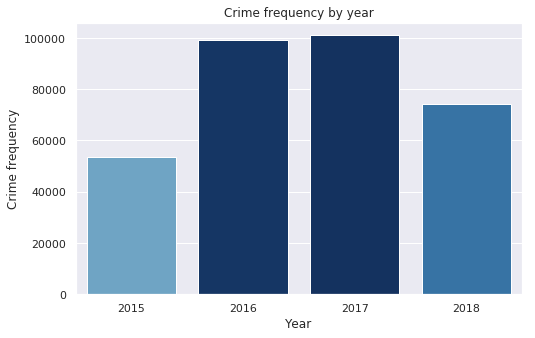

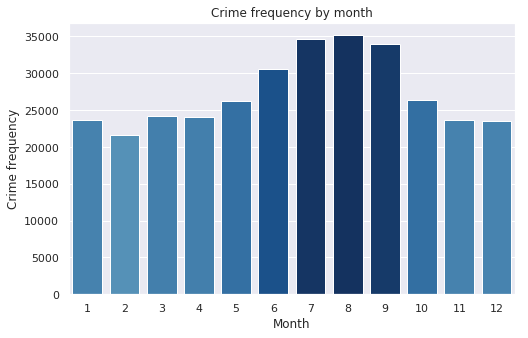

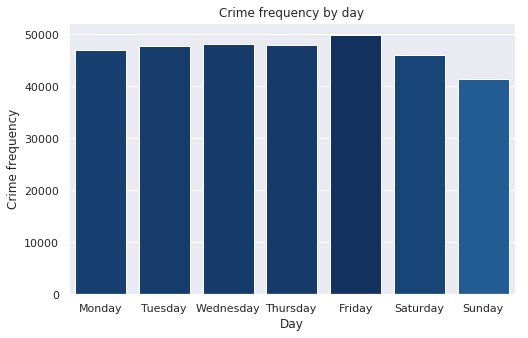

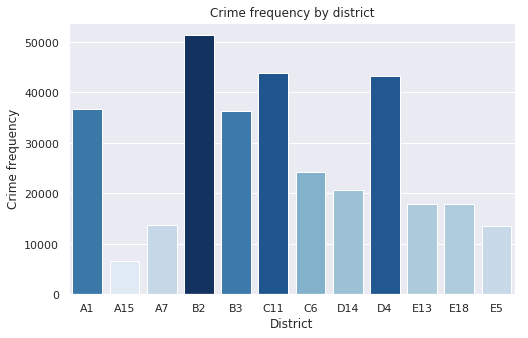

In [69]:
make_plot(year_group, 'Year', 'Crime frequency',
          'Crime frequency by year', images_path, 'year.png')
make_plot(month_group, 'Month', 'Crime frequency',
          'Crime frequency by month', images_path, 'month.png')
make_plot(day_group, 'Day', 'Crime frequency',
          'Crime frequency by day', images_path, 'day.png')
make_plot(distr_group, 'District', 'Crime frequency',
          'Crime frequency by district', images_path, 'district.png')

### Question 2

We have to find the year and the district with most shootings. 

In [70]:
shootings_year_group = df.loc[df['SHOOTING'] == 'Y'].groupby(
    ['YEAR'])['INCIDENT_NUMBER'].count()

print('Year with most shootings is', shootings_year_group.idxmax())

Year with most shootings is 2017


In [71]:
shootings_distr_group = df.loc[df['SHOOTING'] == 'Y'].groupby(
    ['DISTRICT'])['INCIDENT_NUMBER'].count()
print('District with most shootings is', shootings_distr_group.idxmax())

District with most shootings is B2


### Question 3

We have to add a new column with values 'day' or 'night'. When 'HOUR' is between 18.00 and 6.00 it is considered night, else it's day. We have to also find if crimes are more frequent during the day or the night.

In [72]:
# add new series ('LIGHT) to dataframe that show if incident occured during the 
# day or during the night
l = []
for i, val in df['HOUR'].iteritems():
    # if hour is between 6pm (18) and 6am (0) it's night, else it's day
    if (val >= 18) or (val <= 6):
        l.append('night')
    else:
        l.append('day')

new_ser = pd.Series(l)
df['LIGHT'] = new_ser

df.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long,Location,LIGHT
0,I182080058,2403,Disorderly Conduct,E18,N,2018,10,Wednesday,20,42.262608,-71.121186,"(42.26260773, -71.12118637)",night
1,I182080053,3201,Property Lost,D14,N,2018,8,Thursday,20,42.352111,-71.135311,"(42.35211146, -71.13531147)",night
2,I182080052,2647,Other,B2,N,2018,10,Wednesday,19,42.308126,-71.076930,"(42.30812619, -71.07692974)",night
3,I182080051,413,Aggravated Assault,A1,N,2018,10,Wednesday,20,42.359454,-71.059648,"(42.35945371, -71.05964817)",night
4,I182080050,3122,Aircraft,A7,N,2018,10,Wednesday,20,42.375258,-71.024663,"(42.37525782, -71.02466343)",night


In [73]:
light_count = df.groupby(['LIGHT'])['INCIDENT_NUMBER'].count()
print('Most crimes were committed during the', light_count.idxmax())

Most crimes were committed during the day


### Question 4

We have to find the most frequent type of crime that is committed during the day.

In [74]:
light_group = df.loc[df['LIGHT'] == 'day'].groupby(
    ['OFFENSE_CODE_GROUP'])['INCIDENT_NUMBER'].count()
print('Most frequent type of crime during the day is', light_group.idxmax())

Most frequent type of crime during the day is Motor Vehicle Accident Response


### Question 5

We have to cluster crimes based on their location using KMeans.

Let's create a new dataset only with 'Lat' and 'Long' values. We will remove rows with null values and the outliers. Then we will make a scatterplot for crime locations. 

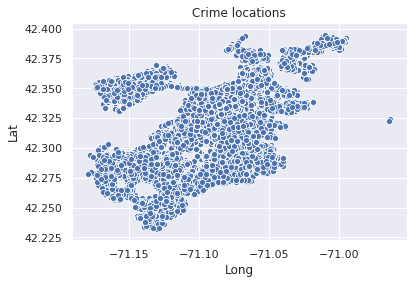

In [79]:
location = df[['Lat', 'Long']]
# drop nan values in location
location = location.dropna()
# remove outliers
location = location.loc[(location['Lat'] > 40) & (location['Long'] < -60)]
# make a scatterplot for crime locations
ax = sns.scatterplot(x='Long', y='Lat', data=location)
plt.title('Crime locations')
plt.savefig(images_path + 'scatter.png', bbox_inches="tight")
plt.show()
plt.close()

We will now test KMeans with 2, 3, 5 and 10 clusters. First, let's define the function clusters with KMeans and makes the plots.

In [0]:
def kmeans(df, images_path, image_name, title, n_clusters):
    """ Cluster locations using KMeans and make a plot. """
    # make a copy so that initial dataset remains the same
    df_cp = df.copy()

    km = KMeans(n_clusters=n_clusters)
    km.fit(df_cp)
    km.predict(df_cp)
    labels = km.labels_

    LABEL_COLOR_MAP = {0: 'darkturquoise',
                       1: 'plum',
                       2: 'saddlebrown',
                       3: 'greenyellow',
                       4: 'green',
                       5: 'royalblue',
                       6: 'gold',
                       7: 'firebrick',
                       8: 'coral',
                       9: 'darkmagenta'
                       }

    label_color = [LABEL_COLOR_MAP[l] for l in labels]
    # make plot
    plt.scatter(x='Long', y='Lat', c=label_color, data=df_cp)
    plt.title(title)
    plt.savefig(images_path + image_name, bbox_inches="tight")
    plt.show()
    plt.close()

The function will now be applied to our data.

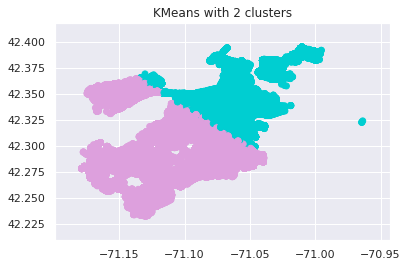

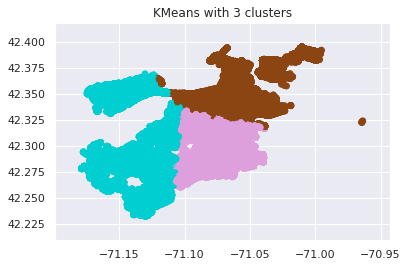

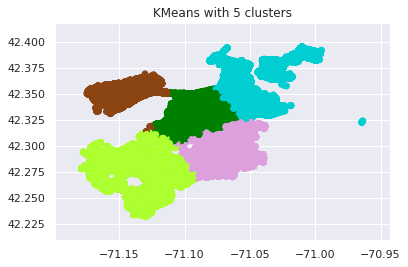

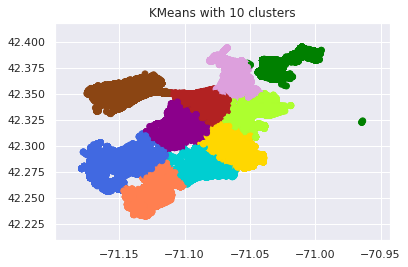

In [84]:
kmeans(location, images_path, 'kmeans2.png', 'KMeans with 2 clusters', 2)
kmeans(location, images_path, 'kmeans3.png', 'KMeans with 3 clusters', 3)
kmeans(location, images_path, 'kmeans5.png', 'KMeans with 5 clusters', 5)
kmeans(location, images_path, 'kmeans10.png', 'KMeans with 10 clusters', 10)

Now, let's combine more columns with location. We'll try 'OFFENSE_CODE' and 'MONTH'.

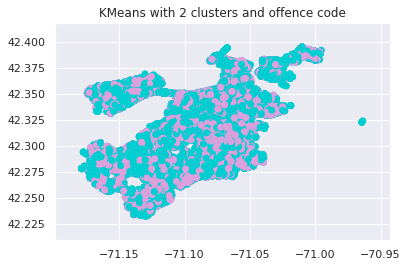

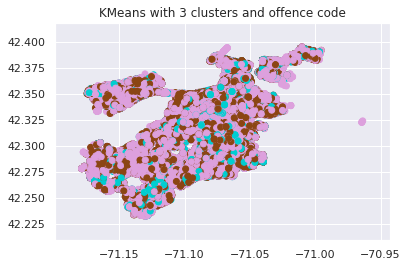

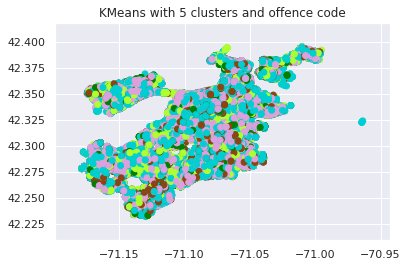

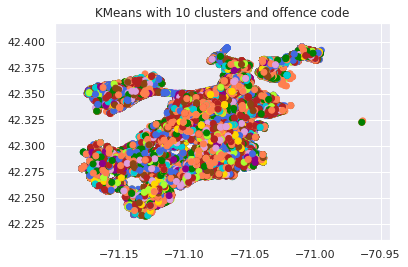

In [91]:
location = df[['Lat', 'Long', 'OFFENSE_CODE']]
# drop nan values in location
location = location.dropna()
# remove outliers
location = location.loc[(location['Lat'] > 40) & (location['Long'] < -60)]
                                                  
kmeans(location, images_path, 'kmeansoffence2.png', 
       'KMeans with 2 clusters and offence code', 2)
kmeans(location, images_path, 'kmeansoffence3.png',
       'KMeans with 3 clusters and offence code', 3)
kmeans(location, images_path, 'kmeansoffence5.png',
       'KMeans with 5 clusters and offence code', 5)
kmeans(location, images_path, 'kmeansoffence10.png',
       'KMeans with 10 clusters and offence code', 10)

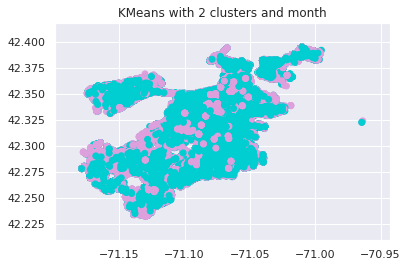

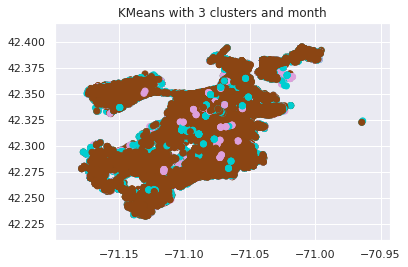

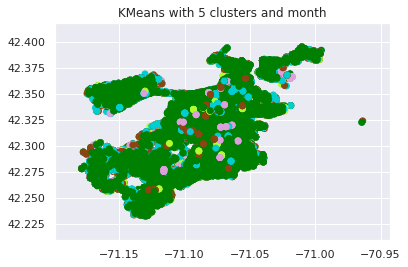

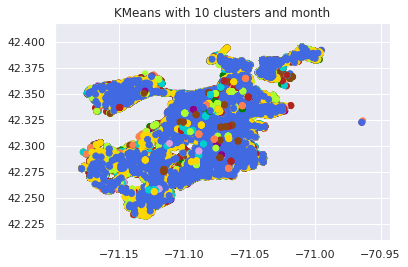

In [92]:
location = df[['Lat', 'Long', 'MONTH']]
# drop nan values in location
location = location.dropna()
# remove outliers
location = location.loc[(location['Lat'] > 40) & (location['Long'] < -60)]

kmeans(location, images_path, 'kmeansmonth2.png',
       'KMeans with 2 clusters and month', 2)
kmeans(location, images_path, 'kmeansmonth3.png',
       'KMeans with 3 clusters and month', 3)
kmeans(location, images_path, 'kmeansmonth5.png',
       'KMeans with 5 clusters and month', 5)
kmeans(location, images_path, 'kmeansmonth10.png',
       'KMeans with 10 clusters and month', 10)

### Bonus Question

We have to make an interactive map with clusters for a specific type of crime.

We will use [folium](https://github.com/python-visualization/folium) to make our map. You can change the variable crime_type and set the crime you would like the map to display.



In [0]:
# You can change this variable depending on the type of the crime you would like 
# the map to display
crime_type = 'Larceny'

location = df[['Lat', 'Long', 'OFFENSE_CODE_GROUP']].head(100000)
# drop nan values in location
location = location.dropna()
# remove outliers
location = location.loc[(location['Lat'] > 40) & (location['Long'] < -60)]

tup = tuple(location[['Lat', 'Long']].iloc[0])
m = folium.Map(location=tup)
locations = []
for index, row in location.iterrows():
    if row['OFFENSE_CODE_GROUP'] == crime_type:
        locations.append(tuple(row[['Lat', 'Long']]))

incid = folium.FeatureGroup(name='Incidents')
incid.add_child(MarkerCluster(locations=locations))
m.add_child(incid)
m.save(map_path + 'map.html')

m